In [184]:
#importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
#to plot in jupyter
pd.options.mode.chained_assignment=None
import seaborn as sns
import string
from scipy import stats

In [185]:
# import file with data
path='cars_engage_2022.csv'
df = pd.read_csv(path)

In [186]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#dropping columns in which more than two-third the data is Null
df.replace("?", np.NaN, inplace = True)
missing_data = df.isnull()
rows=df.shape[0]
for c in missing_data.columns.values.tolist():
    if(missing_data[c].values.sum()>2*rows/3):
        #drop column
        df=df.drop(columns=c)

In [188]:
df.shape

(1276, 115)

In [189]:
# filling false in null values of boolean type columns
cols=df.columns
for c in cols:
    if(df[c].nunique()<=1):
        df[c].fillna(value=False, inplace=True)

In [190]:
df.dtypes

Unnamed: 0                   int64
Make                        object
Model                       object
Variant                     object
Ex-Showroom_Price            int64
                             ...  
Rain_Sensing_Wipers           bool
Leather_Wrapped_Steering      bool
Automatic_Headlamps           bool
ASR_/_Traction_Control        bool
Cruise_Control                bool
Length: 115, dtype: object

In [191]:

# filling mean in null values of float type columns
for c in cols:
    if(df[c].dtype==float):
        print(c)
        mean=df[c].mean()
        df[c].fillna(value=round(mean,0), inplace=True)

Displacement
Cylinders
Valves_Per_Cylinder
Fuel_Tank_Capacity
Height
Length
Width
Doors
City_Mileage
Highway_Mileage
Ground_Clearance
Seating_Capacity
Wheelbase
Minimum_Turning_Radius
Number_of_Airbags


In [192]:
# filling mode in null values of object type columns
for c in cols:
    if(df[c].dtype==object):
        print(c)
        df.fillna(df.mode().iloc[0], inplace=True)

Make
Model
Variant
Drivetrain
Cylinder_Configuration
Emission_Norm
Engine_Location
Fuel_System
Fuel_Type
Body_Type
ARAI_Certified_Mileage
Kerb_Weight
Gears
Front_Brakes
Rear_Brakes
Front_Suspension
Rear_Suspension
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power_Steering
Power_Windows
Keyless_Entry
Power
Torque
Odo
Speedo
Tacho
Trip
Seats_Material
Type
Wheels_Size
12v_Power_Outlet
Audiosystem
Basic_Warranty
Boot-lid_Opener
Boot_Space
Clock
Cup_Holders
Door_Pockets
Extended_Warranty
Fuel-lid_Opener
Fuel_Gauge
Handbrake
Instrument_Console
Sun_Visor
Third_Row_AC_Vents
Ventilation_System
Headlight_Reminder
Adjustable_Headrests
Gross_Vehicle_Weight
Airbags
Adjustable_Steering_Column
Parking_Assistance
Infotainment_Screen
Multifunction_Steering_Wheel
Seat_Height_Adjustment
Rear_Center_Armrest


In [193]:
# since we are going to predict Price
# the rows with Ex-Showroom_Price as null can be dropped
df.dropna(subset=['Ex-Showroom_Price'], axis=0, inplace=True)

In [194]:
#Typecasting Ex-Showroom_Price as float
# df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].astype("float")

In [195]:
if(df.isnull().sum().sum()==0):
    print("There are no null values in dataframe")

There are no null values in dataframe


In [196]:
# saving cleaned data
df.to_csv('no_null_df.csv')

In [197]:
# normalization
for c in cols:
    if(df[c].dtype==float):
        df[c] = (df[c]-df[c].min())/(df[c].max()-df[c].min())
        print(c)

Displacement
Cylinders
Valves_Per_Cylinder
Fuel_Tank_Capacity
Height
Length
Width
Doors
City_Mileage
Highway_Mileage
Ground_Clearance
Seating_Capacity
Wheelbase
Minimum_Turning_Radius
Number_of_Airbags


In [198]:
#making dummy variables
print(df.shape)

for c in cols:
    if(df[c].dtype==object):
        dummy_variable = pd.get_dummies(df[c])
        cols1=dummy_variable.columns
        for c1 in cols1:
            dummy_variable.rename(columns={c1:c+"_"+c1}, inplace=True)
        df = pd.concat([df, dummy_variable], axis=1)
        df.drop(c, axis = 1, inplace=True)

print(df.shape)

(1276, 115)
(1276, 4754)


In [199]:
#notice dummy columns
print(df.columns)

Index(['Unnamed: 0', 'Ex-Showroom_Price', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Fuel_Tank_Capacity', 'Height', 'Length',
       'Width', 'Doors',
       ...
       'Multifunction_Steering_Wheel_With gear shift paddles, Multifunction Steering Wheel',
       'Seat_Height_Adjustment_Electric Adjustment',
       'Seat_Height_Adjustment_Electric Adjustment with Memory',
       'Seat_Height_Adjustment_Manual Adjustment',
       'Seat_Height_Adjustment_Semi Automatic Adjustment',
       'Rear_Center_Armrest_Audio Controls',
       'Rear_Center_Armrest_Audio Controls, Cup Holders',
       'Rear_Center_Armrest_Cup Holders',
       'Rear_Center_Armrest_Cup Holders, Audio Controls',
       'Rear_Center_Armrest_TRUE'],
      dtype='object', length=4754)


In [200]:
# saving cleaned data
df.to_csv('clean_df.csv')

In [201]:
odf=pd.read_csv(path)#original dataframe
df=pd.read_csv('clean_df.csv')

In [202]:
# Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
# - summarize main characteristics of the data - gain better understanding of the dataset,
# - uncover relationships between different variables, and
# - extract important variables for the problem we are trying to solve.

In [203]:
# The main question we are trying to answer in this module is:
# “What are the characteristics that have the most impact on the car price?”

In [204]:
# Descriptive Statistical Analysis
# Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the sample and measures of the data. 

In [205]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,...,"Multifunction_Steering_Wheel_With gear shift paddles, Multifunction Steering Wheel",Seat_Height_Adjustment_Electric Adjustment,Seat_Height_Adjustment_Electric Adjustment with Memory,Seat_Height_Adjustment_Manual Adjustment,Seat_Height_Adjustment_Semi Automatic Adjustment,Rear_Center_Armrest_Audio Controls,"Rear_Center_Armrest_Audio Controls, Cup Holders",Rear_Center_Armrest_Cup Holders,"Rear_Center_Armrest_Cup Holders, Audio Controls",Rear_Center_Armrest_TRUE
count,1276.000000,1276.000000,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,...,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,637.500000,637.500000,4.596538e+06,0.225578,0.168663,0.198642,0.412364,0.595636,0.705108,0.803321,...,0.007053,0.131661,0.187304,0.670063,0.010972,0.010188,0.008621,0.824451,0.002351,0.154389
std,368.493781,368.493781,1.214735e+07,0.133586,0.115686,0.053316,0.177860,0.059162,0.078296,0.067540,...,0.083720,0.338255,0.390308,0.470374,0.104211,0.100460,0.092483,0.380585,0.048450,0.361463
min,0.000000,0.000000,2.364470e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,318.750000,318.750000,7.438760e+05,0.142154,0.142857,0.200000,0.288889,0.559621,0.654982,0.762606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,637.500000,637.500000,1.060064e+06,0.179902,0.142857,0.200000,0.388889,0.582858,0.710712,0.797226,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,956.250000,956.250000,2.979828e+06,0.243151,0.142857,0.200000,0.500000,0.623710,0.758187,0.831172,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1275.000000,1275.000000,2.121554e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
odf.describe(include="all")

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
count,1276.000000,1201,1276,1276,1.276000e+03,1264.000000,1210.000000,1174.000000,1269,1263,...,587,502,34,442,549,29.000000,51,69,13,17
unique,NaN,39,263,1064,NaN,NaN,NaN,NaN,4,4,...,1,1,11,1,1,NaN,1,1,5,8
top,NaN,Maruti Suzuki,Nexon,Lxi,NaN,NaN,NaN,NaN,FWD (Front Wheel Drive),In-line,...,True,True,"Revotron 1.2 L, BS6 Engine",True,True,NaN,True,True,"21.5 kWh,Battery Placed Under Rear Seats",110 km/full charge
freq,NaN,149,24,9,NaN,NaN,NaN,NaN,887,1077,...,587,502,6,442,549,NaN,51,69,3,5
mean,637.500000,NaN,NaN,NaN,4.596538e+06,1858.804589,4.380992,3.977853,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.793103,NaN,NaN,NaN,NaN
std,368.493781,NaN,NaN,NaN,1.214735e+07,1063.152389,1.660957,0.833763,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.773642,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,2.364470e+05,72.000000,2.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,318.750000,NaN,NaN,NaN,7.438760e+05,1198.000000,4.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,637.500000,NaN,NaN,NaN,1.060064e+06,1497.000000,4.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,956.250000,NaN,NaN,NaN,2.979828e+06,1998.000000,4.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [207]:
object_columns=odf.select_dtypes(include=['object']).columns
for c in object_columns:
    c_counts=odf[c].value_counts()
    # c_counts.rename(columns={c:'value_counts'}, inplace=True)
    c_counts.index.name=c
    print(c_counts)

Make
Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Lamborghini          13
Mg                   13
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Bentley               6
Premier               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: Make, dtype: int64
Model
Nexon                       

In [208]:
nndf=pd.read_csv('no_null_df.csv')
df_test=nndf[['Drivetrain','Body_Type','Ex-Showroom_Price']]
df_grp=df_test.groupby(['Drivetrain','Body_Type'],as_index=False).mean()
df_pivot=df_grp.pivot(index='Drivetrain',columns='Body_Type')
df_pivot

Ex-Showroom_Price                                   \
Body_Type                     Convertible         Coupe Coupe, Convertible   
Drivetrain                                                                   
4WD                           36019078.00  4.746770e+07                NaN   
AWD (All Wheel Drive)         30712241.25  3.230237e+07         43367500.0   
FWD (Front Wheel Drive)        9437398.40           NaN                NaN   
RWD (Rear Wheel Drive)        27789278.50  2.215978e+07                NaN   

                                                                      \
Body_Type                    Crossover Crossover, SUV      Hatchback   
Drivetrain                                                             
4WD                                NaN            NaN            NaN   
AWD (All Wheel Drive)              NaN      3675000.0            NaN   
FWD (Front Wheel Drive)  814852.611111            NaN  766102.375817   
RWD (Rear Wheel Drive)             NaN            NaN  413218.300000   

                                                                   \
Body_Type                         MPV           MUV       Pick-up   
Drivetrain                                                          
4WD                               NaN           NaN           NaN   
AWD (All Wheel Drive)             NaN           NaN  1.820199e+06   
FWD (Front Wheel Drive)  1.191619e+06  1.373980e+06           NaN   
RWD (Rear Wheel Drive)   1.886240e+06  2.427333e+06           NaN   

                                                                    \
Body_Type                         SUV SUV, Crossover         Sedan   
Drivetrain                                                           
4WD                      1.022235e+07            NaN           NaN   
AWD (All Wheel Drive)    9.518944e+06      4250000.0  1.722258e+07   
FWD (Front Wheel Drive)  1.760863e+06            NaN  1.347141e+06   
RWD (Rear Wheel Drive)   1.685983e+06            NaN  1.482008e+07   

                                                                    \
Body_Type               Sedan, Coupe Sedan, Crossover       Sports   
Drivetrain                                                           
4WD                              NaN              NaN          NaN   
AWD (All Wheel Drive)     17072000.0        4426500.0          NaN   
FWD (Front Wheel Drive)          NaN              NaN          NaN   
RWD (Rear Wheel Drive)     7462000.0              NaN  140732778.0   

                                                               
Body_Type               Sports, Convertible Sports, Hatchback  
Drivetrain                                                     
4WD                                     NaN               NaN  
AWD (All Wheel Drive)                   NaN               NaN  
FWD (Front Wheel Drive)                 NaN         4350000.0  
RWD (Rear Wheel Drive)            7190000.0               NaN

In [209]:
df_test=nndf[['Gears','Power_Steering','Ex-Showroom_Price']]
df_grp=df_test.groupby(['Gears','Power_Steering'],as_index=False).mean()
df_pivot=df_grp.pivot(index='Gears',columns='Power_Steering')
df_pivot

Ex-Showroom_Price                                  \
Power_Steering                 Electric Power Electric Power, Hydraulic Power   
Gears                                                                           
4                                7.577874e+05                             NaN   
5                                1.322869e+06                        890200.0   
6                                1.616378e+06                             NaN   
7                                1.094636e+07                             NaN   
7 Dual Clutch                    2.121554e+08                             NaN   
8                                1.567470e+07                             NaN   
9                                6.934220e+06                             NaN   
Single Speed Reduction Gear      2.371858e+06                             NaN   

                                                                             
Power_Steering              Electro-Hydraulic Hydraulic Power          TRUE  
Gears                                                                        
4                                         NaN             NaN           NaN  
5                                2.159042e+06    2.437009e+06  1.383596e+06  
6                                5.025116e+06    2.229907e+06  3.091097e+06  
7                                1.466049e+07    3.081814e+07  5.187883e+06  
7 Dual Clutch                             NaN             NaN           NaN  
8                                1.902909e+07    1.241955e+07  1.227625e+07  
9                                7.841300e+06    2.720000e+06           NaN  
Single Speed Reduction Gear               NaN             NaN           NaN

In [210]:
#ANOVA
# ANOVA can be used to find the correlation between different groups of a categorical
# variable.

In [211]:
# The ANOVA test returns two values: the F-test score and the p-value.
# The F-test calculates the ratio of variation between the groups's mean over the variation
# within each of the sample groups.
# The p-value shows whether the obtained result is statistically significant.

# there is a strong correlation between a categorical variable
# and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

In [212]:
df_anova=nndf[["Make","Ex-Showroom_Price"]]
grouped_anova=df_anova.groupby(["Make"])
anova_results=stats.f_oneway(grouped_anova.get_group("Nissan")["Ex-Showroom_Price"], grouped_anova.get_group("Toyota")["Ex-Showroom_Price"])
print(anova_results)
# The prices between Nissan and Toyota are not significantly different, as the F-test
# score is less than 1 and p-value is larger than 0.05.

F_onewayResult(statistic=0.0060029257662219246, pvalue=0.9383848989127161)


In [213]:
df_anova=nndf[["Make","Ex-Showroom_Price"]]
grouped_anova=df_anova.groupby(["Make"])
anova_results=stats.f_oneway(grouped_anova.get_group("Nissan")["Ex-Showroom_Price"], grouped_anova.get_group("Land Rover")["Ex-Showroom_Price"])
print(anova_results)
# The prices between Nissan and Land Rover are significantly different, since the F-score
# is very large and the p-value is less than 0.05.

F_onewayResult(statistic=29.77551605033789, pvalue=3.4172263511883107e-06)


In [214]:
# Correlation
# Correlation is a statistical metric for measuring to what extent different variables are interdependent.

(0.0, 223493391.19291306)

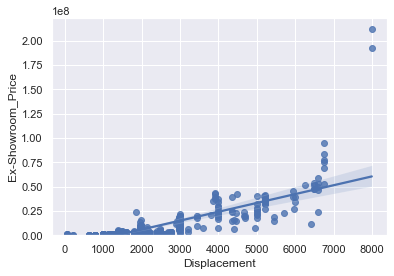

In [215]:
sns.regplot(x='Displacement',y='Ex-Showroom_Price',data=nndf)
plt.ylim(0,)
#  the straight line through the data points is very steep,
# which shows that there is a positive linear relationship between the two variables.

(0.0, 223158630.33347923)

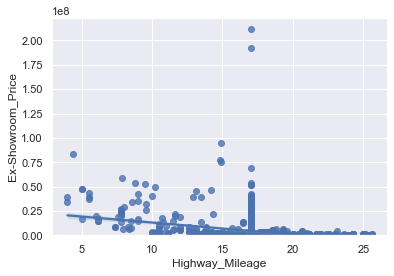

In [216]:
sns.regplot(x='Highway_Mileage',y='Ex-Showroom_Price',data=nndf)
plt.ylim(0,)
#  the straight line through the data points is very steep with negative slope,
# which shows that there is a negative linear relationship between the two variables.

(0.0, 222751344.5)

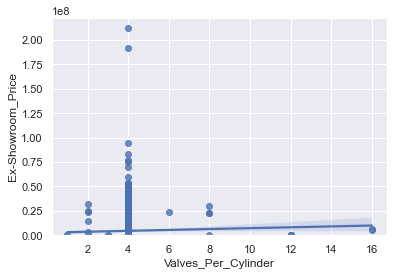

In [217]:
sns.regplot(x='Valves_Per_Cylinder',y='Ex-Showroom_Price',data=nndf)
plt.ylim(0,)
# weak correlation

In [218]:
float_columns=df.select_dtypes(include=['float64']).columns
bool_columns=df.select_dtypes(include=['bool']).columns

In [219]:
#Float columns with mod(pearson_coef) greater than 0.3 and p-value<0.001
cols2=float_columns
for c2 in cols2:
    pearson_coef, p_value = stats.pearsonr(df[c2], df['Ex-Showroom_Price'])
    # print(c2,"\t ",pearson_coef, "\t ", p_value)
    if((pearson_coef>0.3 or pearson_coef<-0.3 ) and p_value<0.001):
        print(c2)

Displacement
Cylinders
Fuel_Tank_Capacity
Length
Width
Doors
Highway_Mileage
Seating_Capacity
Wheelbase
Number_of_Airbags


In [220]:
#Boolean columns with mod(pearson_coef) greater than 0.3 and p-value<0.001
cols2=bool_columns
for c2 in cols2:
    pearson_coef, p_value = stats.pearsonr(df[c2], df['Ex-Showroom_Price'])
    if((pearson_coef>0.3 or pearson_coef<-0.3 ) and p_value<0.001):
        print(c2)

Hill_Assist
ESP_(Electronic_Stability_Program)
Rain_Sensing_Wipers
Leather_Wrapped_Steering
Automatic_Headlamps
ASR_/_Traction_Control
Cruise_Control


In [221]:
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].astype("float")

#Finding correlation
temp=df.select_dtypes(include=['float64'])
temp.corr()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,Ground_Clearance,Seating_Capacity,Wheelbase,Minimum_Turning_Radius,Number_of_Airbags
Ex-Showroom_Price,1.000000,0.793244,0.817001,0.029753,0.469788,-0.187451,0.401162,0.419923,-0.460311,-0.010661,-0.302773,-0.011276,-0.307150,0.423027,-0.004204,0.328350
Displacement,0.793244,1.000000,0.878926,0.032901,0.743476,-0.025286,0.651136,0.620105,-0.471849,-0.014865,-0.464407,0.027843,-0.162028,0.645678,0.013074,0.530460
Cylinders,0.817001,0.878926,1.000000,-0.001578,0.647891,-0.167383,0.535101,0.520630,-0.501299,-0.008652,-0.394283,0.001588,-0.313152,0.529945,-0.002317,0.434289
Valves_Per_Cylinder,0.029753,0.032901,-0.001578,1.000000,0.043678,-0.069232,0.081218,0.047060,-0.028428,0.003692,-0.034956,-0.053819,-0.023182,0.070470,0.002234,0.058796
Fuel_Tank_Capacity,0.469788,0.743476,0.647891,0.043678,1.000000,0.161285,0.760035,0.706996,-0.293712,-0.021028,-0.462262,0.150046,0.026238,0.756686,0.017802,0.636203
Height,-0.187451,-0.025286,-0.167383,-0.069232,0.161285,1.000000,0.131734,0.171053,0.525705,-0.019793,-0.058541,0.426614,0.722122,0.213432,0.190976,0.040454
Length,0.401162,0.651136,0.535101,0.081218,0.760035,0.131734,1.000000,0.796481,-0.263282,0.007920,-0.415108,0.120916,0.125886,0.883851,0.072290,0.618127
Width,0.419923,0.620105,0.520630,0.047060,0.706996,0.171053,0.796481,1.000000,-0.146908,-0.012343,-0.331213,0.211722,0.029383,0.713641,0.026612,0.556274
Doors,-0.460311,-0.471849,-0.501299,-0.028428,-0.293712,0.525705,-0.263282,-0.146908,1.000000,-0.017953,0.281169,0.298366,0.520719,-0.151559,0.016031,-0.206771
City_Mileage,-0.010661,-0.014865,-0.008652,0.003692,-0.021028,-0.019793,0.007920,-0.012343,-0.017953,1.000000,0.005046,-0.007343,-0.008813,0.000260,-0.000283,-0.022194


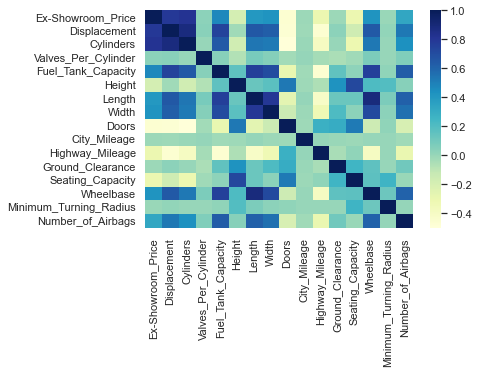

In [222]:
# plotting correlation heatmap
sns.set_theme()
dataplot = sns.heatmap(temp.corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()

In [223]:
# Model Development
# A model or estimator can be thought of as a mathematical equation used to predict a
# value given one or more other values.
# Relating one or more independent variables or features to dependent variables.

In [224]:
lm=LinearRegression()

In [225]:
# Simple Linear Regression


In [226]:
# independent columns
x = df[['Cylinders']]
# dependent columns
y = df['Ex-Showroom_Price']

In [227]:
lm.fit(x,y)

LinearRegression()

In [228]:
Y_hat=lm.predict(x)

In [229]:
print("Predicted_Ex-Showroom_Price = ",lm.coef_,"*Cylinders + ",lm.intercept_)

Predicted_Ex-Showroom_Price =  [85787702.1692428] *Cylinders +  -9872693.339673558


<AxesSubplot:ylabel='Density'>

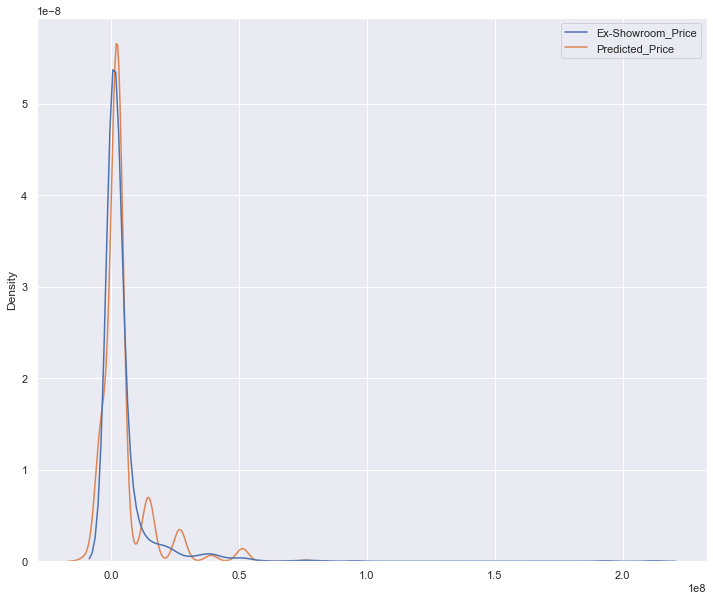

In [230]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(Y_hat)
sns.kdeplot(data=xdf)

In [231]:
# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.6674908628519802


In [232]:
# Find RMSE
print(np.sqrt(metrics.mean_squared_error(y,Y_hat)))

7001852.905250838


In [233]:
# Residual plot
# We expect to see the results to have zero mean.
# Distributed evenly around the x axis with similar variance; there is no curvature.
# This type of residual plot suggests a linear plot is appropriate.


<AxesSubplot:xlabel='Cylinders', ylabel='Ex-Showroom_Price'>

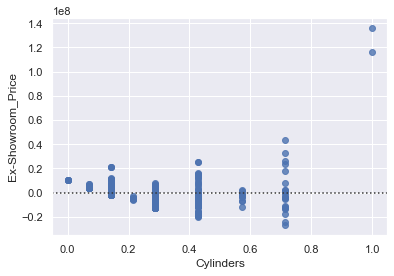

In [234]:
sns.residplot(x=df[['Cylinders']],y=df['Ex-Showroom_Price'])

In [235]:
#model evaluation

In [236]:
# Generalization error is a measure of how well our data does at predicting previously unseen data.
# we use cross validation 

In [237]:
from sklearn.model_selection import cross_val_score

In [238]:
scores=cross_val_score(lm,x,y,cv=3)
print(np.mean(scores))

0.27442051401829487


In [239]:
# Multiple Linear Regression

In [240]:
# independent columns
# choosing Z based on pearson coefficient and p-values
Z = df[['Displacement','Cylinders','Fuel_Tank_Capacity','Wheelbase','Highway_Mileage'
    ,'Seating_Capacity','Number_of_Airbags','Hill_Assist','ESP_(Electronic_Stability_Program)',
    'Rain_Sensing_Wipers','Leather_Wrapped_Steering','Automatic_Headlamps','ASR_/_Traction_Control'
    ,'Cruise_Control']]
# dependent columns
y = df['Ex-Showroom_Price']

In [241]:
lm.fit(Z,y)
Y_hat = lm.predict(Z)

In [242]:
# A distribution plot counts the predicted value versus the actual value.
# These plots are extremely useful for visualizing models with more than one independent variable

<AxesSubplot:ylabel='Density'>

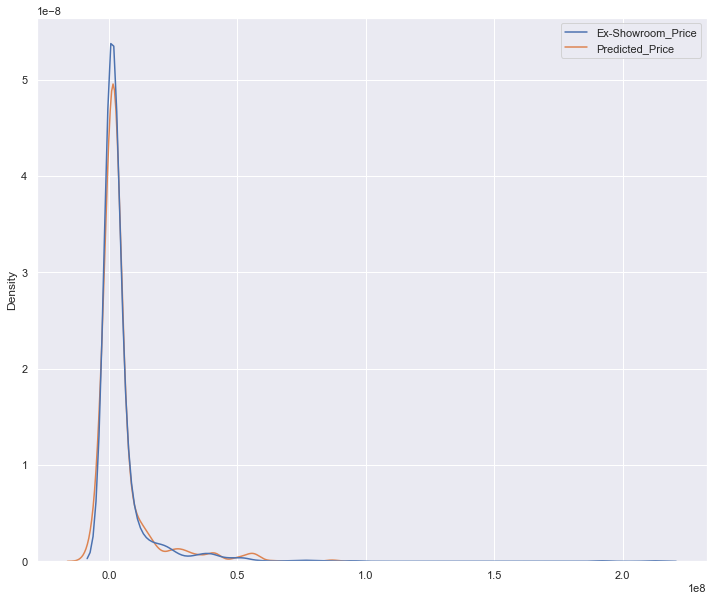

In [243]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(Y_hat)
sns.kdeplot(data=xdf)

In [244]:
print("Predicted_Ex-Showroom_Price=")
coef=list(lm.coef_)
for index,i in enumerate(Z):
    print(coef[index],"*",i,"+")
print(lm.intercept_)

Predicted_Ex-Showroom_Price=
50569436.56851163 * Displacement +
48896871.04403164 * Cylinders +
-16304151.983656619 * Fuel_Tank_Capacity +
5297980.950824243 * Wheelbase +
3151682.049559887 * Highway_Mileage +
-11227635.007667208 * Seating_Capacity +
-2119828.4306637137 * Number_of_Airbags +
411160.7082728986 * Hill_Assist +
123906.3657209713 * ESP_(Electronic_Stability_Program) +
-160770.522861585 * Rain_Sensing_Wipers +
-89571.3184688275 * Leather_Wrapped_Steering +
271382.539780458 * Automatic_Headlamps +
-736238.9880168983 * ASR_/_Traction_Control +
153882.46175452424 * Cruise_Control +
-9282807.219279319


In [245]:
# Find the R^2
print('The R-square is: ', lm.score(Z, y))

The R-square is:  0.7286047663469001


In [246]:
# Find RMSE
print(np.sqrt(metrics.mean_squared_error(y,Y_hat)))

6325754.002773051


In [247]:
# Model Evaluation
# we use cross validation 

In [248]:
scores=cross_val_score(lm,Z,y,cv=3)
print(np.mean(scores))

0.3812579535525023


In [249]:
#polynomial regression and pipeline

In [250]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [251]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [252]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [253]:
Y_hat=pipe.predict(Z)

<AxesSubplot:ylabel='Density'>

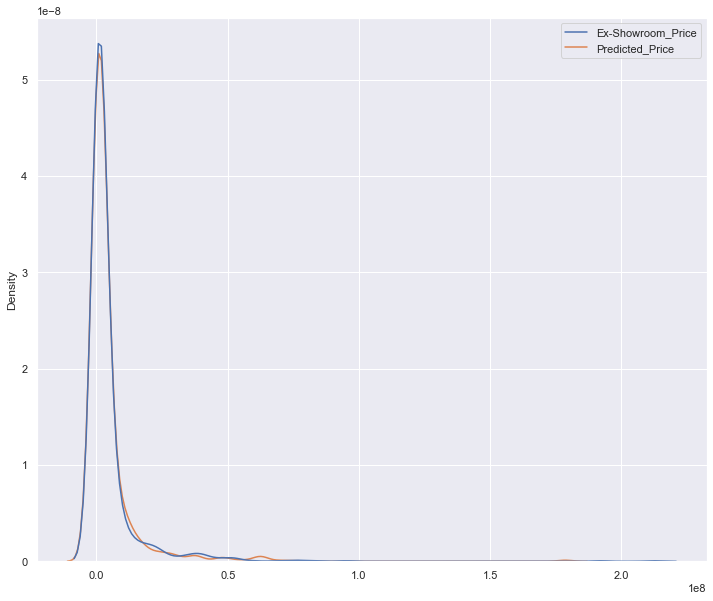

In [254]:
width = 12
height = 10
plt.figure(figsize=(width, height))

xdf=y.to_frame()
xdf['Predicted_Price']=list(Y_hat)
sns.kdeplot(data=xdf)

In [255]:
from sklearn.metrics import r2_score

In [256]:
#R^2
print('The R-square value is: ', r2_score(y,Y_hat))

The R-square value is:  0.919676631348656


In [257]:
# Find RMSE
print(np.sqrt(metrics.mean_squared_error(y,Y_hat)))

3441376.1760693043


In [258]:
# Model Evaluation using cross Validation
scores=cross_val_score(pipe,Z,y,cv=3)
print(np.mean(scores))

0.10267976474399616


In [259]:
# Ridge Regression with Grid Search
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size=0.10, random_state=1)
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_train, y_train)
BestRR=Grid1.best_estimator_
BestRR.score(x_test, y_test)

0.7905257069098777

In [260]:
#save the model
# file = open("expense_model.pkl", 'wb')
# pickle.dump(linreg, file)